In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration
## 1. Plot a few images from each category
Observation: These images have colors with pixel size of 256*256. Some of the colors overlap with very similar shapes.

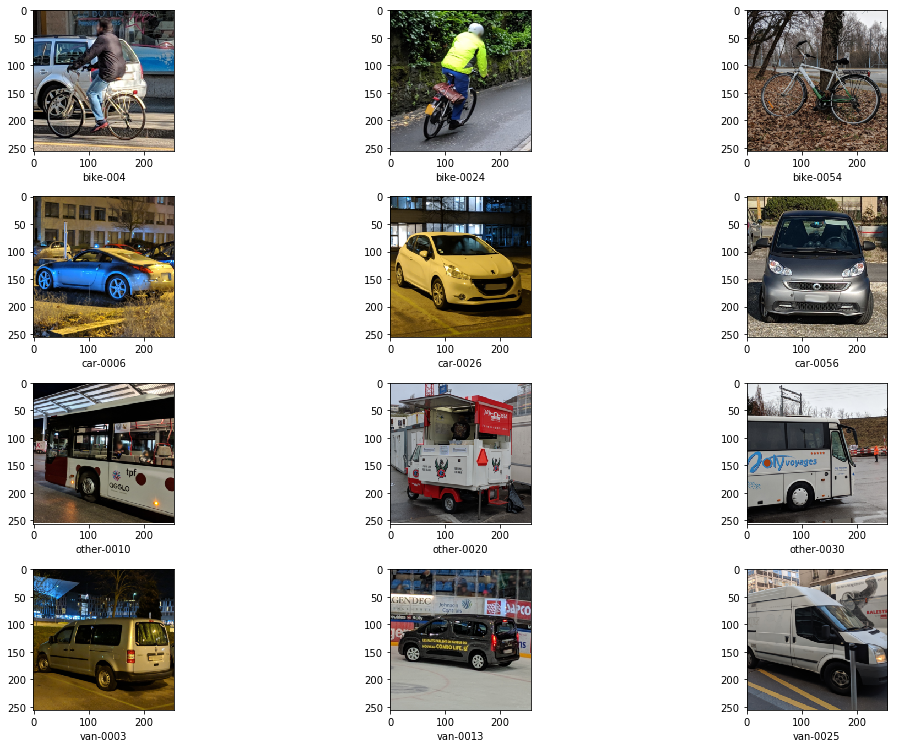

In [2]:
path1 ='swissroads/train/bike/bike-0004.png'
pillow_img1 = Image.open(path1)
img1 = np.array(pillow_img1)
path2 ='swissroads/train/bike/bike-0024.png'
pillow_img2 = Image.open(path2)
img2 = np.array(pillow_img2)
path3 ='swissroads/train/bike/bike-0054.png'
pillow_img3 = Image.open(path3)
img3 = np.array(pillow_img3)
path4 ='swissroads/train/car/car-0006.png'
pillow_img4 = Image.open(path4)
img4 = np.array(pillow_img4)
path5 ='swissroads/train/car/car-0026.png'
pillow_img5 = Image.open(path5)
img5 = np.array(pillow_img5)
path6 ='swissroads/train/car/car-0056.png'
pillow_img6 = Image.open(path6)
img6 = np.array(pillow_img6)
path7 ='swissroads/train/other/other-0010.png'
pillow_img7 = Image.open(path7)
img7 = np.array(pillow_img7)
path8 ='swissroads/train/other/other-0020.png'
pillow_img8 = Image.open(path8)
img8 = np.array(pillow_img8)
path9 ='swissroads/train/other/other-0030.png'
pillow_img9 = Image.open(path9)
img9 = np.array(pillow_img9)
path10 ='swissroads/train/van/van-0003.png'
pillow_img10 = Image.open(path10)
img10 = np.array(pillow_img10)
path11 ='swissroads/train/van/van-0013.png'
pillow_img11 = Image.open(path11)
img11 = np.array(pillow_img11)
path12 ='swissroads/train/van/van-0025.png'
pillow_img12 = Image.open(path12)
img12 = np.array(pillow_img12)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(4,3,1)
plt.imshow(img1)
plt.xlabel('bike-004')
plt.subplot(4,3,2)
plt.imshow(img2)
plt.xlabel('bike-0024')
plt.subplot(4,3,3)
plt.imshow(img3)
plt.xlabel('bike-0054')
plt.tight_layout()

plt.subplot(4,3,4)
plt.imshow(img4)
plt.xlabel('car-0006')
plt.subplot(4,3,5)
plt.imshow(img5)
plt.xlabel('car-0026')
plt.subplot(4,3,6)
plt.imshow(img6)
plt.xlabel('car-0056')
plt.tight_layout()

plt.subplot(4,3,7)
plt.imshow(img7)
plt.xlabel('other-0010')
plt.subplot(4,3,8)
plt.imshow(img8)
plt.xlabel('other-0020')
plt.subplot(4,3,9)
plt.imshow(img9)
plt.xlabel('other-0030')
plt.tight_layout()

plt.subplot(4,3,10)
plt.imshow(img10)
plt.xlabel('van-0003')
plt.subplot(4,3,11)
plt.imshow(img11)
plt.xlabel('van-0013')
plt.subplot(4,3,12)
plt.imshow(img12)
plt.xlabel('van-0025')
plt.tight_layout()

plt.show()

## 2. Make a scree plot, how many PCA components explain 10%, 20%, …, 90% and 100% of the variance?
<br> 10 % = 1
<br> 20 % = 3
<br> 30 % = 7
<br> 40 % = 14
<br> 50 % = 25
<br> 60 % = 41
<br> 70 % = 63
<br> 80 % = 121
<br> 90 % = 140
<br> 100 % = 279

- Load back the saved .npz data of the train datasets.
- Assign the extracted features as X for PCA
- Assign the label as y for plotting:
<br> 0: bike
<br> 1: car
<br> 2: motorcycle
<br> 3: other
<br> 4: truck 
<br> 5: van

In [3]:
with np.load('trainfeature.npz', allow_pickle=False) as npz_file:
    traindata = dict(npz_file.items())

X_tr = traindata['features']
y_tr = traindata['targets']

with np.load('validfeature.npz', allow_pickle=False) as npz_file:
    validdata = dict(npz_file.items())

X_va = validdata['features']
y_va = validdata['targets']

X = np.concatenate((X_tr,X_va),axis=0)
y = np.concatenate((y_tr,y_va),axis=0)

In [4]:
from sklearn.decomposition import PCA

# apply PCA using only 2 components
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# apply PCA using unlimited components
pca2 = PCA(n_components=None)
pca2.fit_transform(X)

# Proportion of variance explained
pve = pca2.explained_variance_ratio_

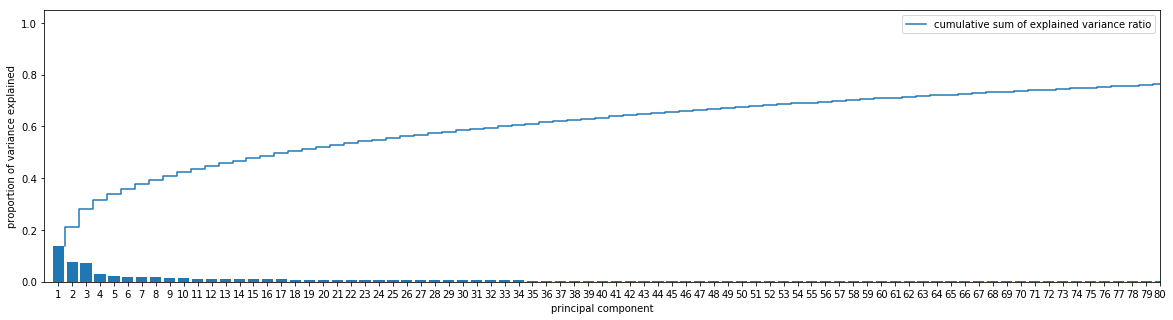

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(figsize=(20,5),facecolor='w')
xcor = np.arange(1, len(pve) + 1) # 1,2,..,n_components
plt.bar(xcor, pve)
plt.xticks(xcor)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor+0.5, # 1.5,2.5,..,n_components+0.5
    pve_cumsum, # Cumulative sum
    label='cumulative sum of explained variance ratio'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')
plt.legend()
plt.xlim(0,80)
plt.show()
plt.tight_layout()

## 3. Visualize the features on a 2d-plot with PCA using the first two components. What can you say about the results?
### Answer: The class of others overlaps with other classes by using only 2 components of PCA for standardized and non-standardized faetures. More principal components are required to seperate the classes properly at higher dimensionality.  

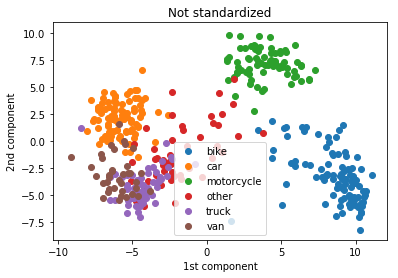

In [6]:
for kind in [0, 1, 2, 3, 4, 5]:
    # Wine samples of this type
    idx = (y == kind)

    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1],
        label='type {}'.format(kind)
    )
    
# Labels and legend
plt.legend(['bike','car','motorcycle','other','truck','van'])
plt.title('Not standardized')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()